### Посылаем GET/POST запросы

In [41]:
import requests
from datetime import datetime, timedelta
import json
from IPython.display import Image

#### GET

In [42]:
SERVER_URL = 'http://google.com'
response = requests.get(SERVER_URL)

In [43]:
type(response)

requests.models.Response

In [44]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

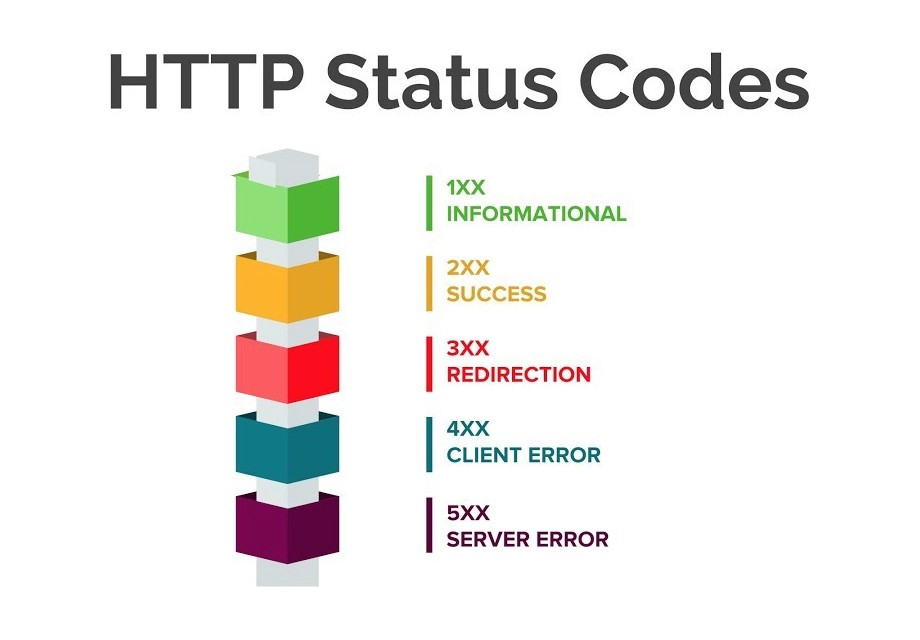

In [45]:
from IPython.display import Image
Image(filename='status_code.jpg') 

In [46]:
# Статус ответа
response.status_code

200

In [47]:
#  Содержимое ответа
response.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ru"><head><meta content="&#1055;&#1086;&#1080;&#1089;&#1082; &#1080;&#1085;&#1092;&#1086;&#1088;&#1084;&#1072;&#1094;&#1080;&#1080; &#1074; &#1080;&#1085;&#1090;&#1077;&#1088;&#1085;&#1077;&#1090;&#1077;: &#1074;&#1077;&#1073; &#1089;&#1090;&#1088;&#1072;&#1085;&#1080;&#1094;&#1099;, &#1082;&#1072;&#1088;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1074;&#1080;&#1076;&#1077;&#1086; &#1080; &#1084;&#1085;&#1086;&#1075;&#1086;&#1077; &#1076;&#1088;&#1091;&#1075;&#1086;&#1077;." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2021/seasonal-holidays-2021-6753651837109324-6752733080595605-cst.gif" itemprop="image"><meta content="&#1050;&#1072;&#1083;&#1077;&#1085;&#1076;&#1072;&#1088;&#1085;&#1099;&#1077; &#1087;&#1088;&#1072;&#1079;&#1076;&#1085;&#1080;&#1082;&#1080;\xa0&#8211; 2021" property="twitter:title"><meta co

#### REAL API
https://stormglass.io/

In [56]:
import os

os.environ['stormglass_token']="your_token"
os.environ['stormglass_token']='123'


In [57]:
start_utc = datetime.now()
end_utc = datetime.now() + timedelta(hours=2)

In [58]:
response = requests.get(
                'https://api.stormglass.io/v2/weather/point',
                params={
                    'lat': 55.7558,
                    'lng': 37.6173,
                    'params': ','.join(['airTemperature','cloudCover']),
                    'start': start_utc,  
                    'end': end_utc  
                    },
                headers={
                    'Authorization': os.environ['stormglass_token']
                    }
                )

In [60]:
# Статус ответа
response.status_code

403

In [61]:
#  Содержимое ответа
response.text

'{"errors":{"key":"API key is invalid"}}\n'

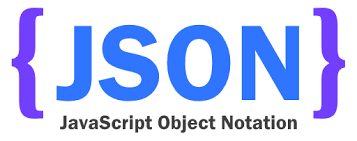

In [52]:
Image(filename='json.png') 

In [53]:
data_in_response = json.loads(response.text)

In [54]:
data_in_response.keys()

dict_keys(['hours', 'meta'])

In [55]:
data_in_response['hours']

[{'airTemperature': {'noaa': -0.84, 'sg': -0.84},
  'cloudCover': {'noaa': 99.27, 'sg': 99.27},
  'time': '2021-12-17T14:00:00+00:00'},
 {'airTemperature': {'noaa': -1.07, 'sg': -1.07},
  'cloudCover': {'noaa': 100.0, 'sg': 100.0},
  'time': '2021-12-17T15:00:00+00:00'},
 {'airTemperature': {'noaa': -1.92, 'sg': -1.92},
  'cloudCover': {'noaa': 91.27, 'sg': 91.27},
  'time': '2021-12-17T16:00:00+00:00'}]